In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [16]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('Sales_root.csv')

In [17]:
# Chọn các cột dữ liệu để sử dụng trong Decision Tree
columns =['Customer_Age','Age_Group','Customer_Gender','Country','State','Product_Category','Sub_Category','Product','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']
data = data[columns]

# Tạo features (X) và target (y)
X = data.drop('Age_Group', axis=1)
y = data['Age_Group']


# Xử lý biến phân loại bằng OneHotEncoder
categorical_features = ['Customer_Gender','Country','Product_Category','Sub_Category','Product','State']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(X[categorical_features])

# Tạo một ColumnTransformer với OneHotEncoder cho các cột phân loại và "passthrough" cho các cột còn lại
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', onehot_encoder, categorical_features),
        ('passthrough', 'passthrough', ~np.in1d(X.columns, categorical_features))
    ]
)

X = preprocessor.fit_transform(X)

# Chuyển đổi target variable thành giá trị số bằng LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)










c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# Tạo một Decision Tree classifier với độ đo "entropy" và giới hạn độ sâu là 5
clf = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=3)

# Huấn luyện classifier
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

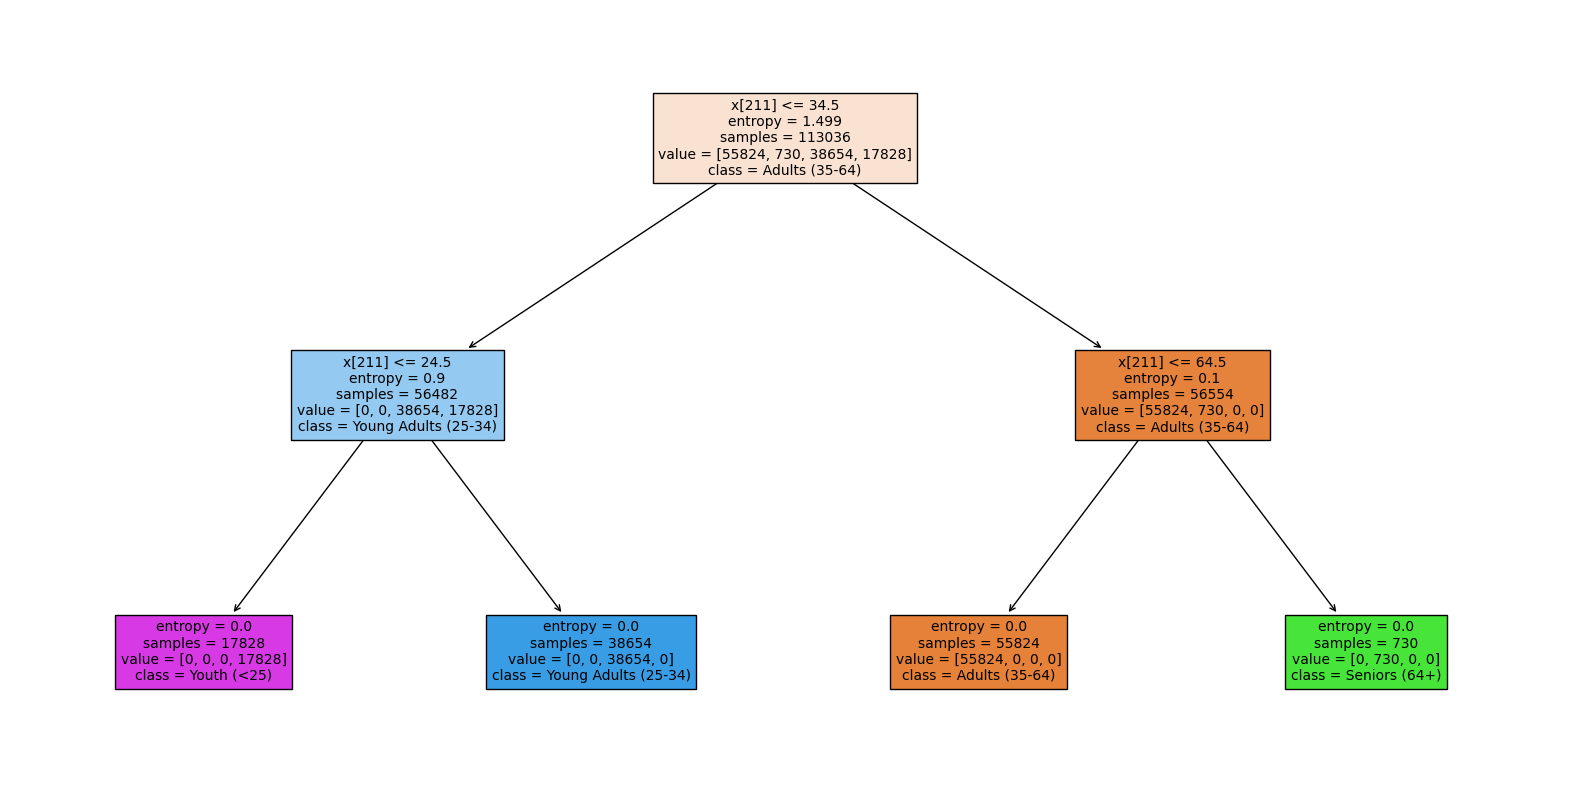

In [19]:
# Vẽ Decision Tree
class_names = label_encoder.inverse_transform(np.unique(y)).astype(str)

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf, filled=True, fontsize=10, class_names=class_names)
plt.savefig('output.png', dpi=100)
plt.show()

In [20]:
# In ra thông tin cây
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # node_id, depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    depth[node_id] = parent_depth + 1

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
print(f"Number of nodes: {n_nodes}")
print(f"Depth of tree: {depth.max()}")

Number of nodes: 7
Depth of tree: 2
